# 第5章 時系列データを活用したビジネス事例

## 5.1 モニタリング指標の異常検知によるキャンペーン評価（自動車ディーラー）

### 5.1.1 事例説明

1. 従来のキャンペンを実施していた2017年12月までのデータを使って予測モデルを構築し、2018年の販売台数を予測する。  
2. その予測値を「従来のキャンペーンを2018年1月も継続した場合」の販売台数と見なす。  
3. この予測値と2018年の実測値を比較し、異常な乖離があるかどうかを見ることで、キャンペーンの良し悪しを評価する。

### 5.1.2 データセットと分析概要

$外れ値スコア（標準化残差の絶対値）=\left| \frac{(残差 - 残差の平均)}{残差の標準偏差}  \right|$

外れ値スコアが「絶対値が1以上」「絶対値が2以上」「絶対値が3以上」かどうかを見て、2σ以上の場合に異常値であると判断する。

### 5.1.3 Pythonの実施例

#### ざっくりした流れ

ステップ１：準備  
ステップ２：異常検知で利用するモデルの構築  
ステップ３：異常検知（評価対象データの期間）

#### ステップ１：準備

まず、必要なライブラリー（パッケージ）のモジュールを読み込む。

#### code 5-1

In [1]:
# 必要なモジュールの読み込み

import numpy as np
import pandas as pd

# pmdarima は Python で ARIMA モデルを自動的に適用するためのライブラリ です。
# pmdarima.utils は、時系列データの前処理や補助機能を提供するユーティリティ。
# 特に、ARIMA モデルを適用する前のデータ変換やチェック に役立つ。
# 関数	役割
# diff()	データの差分を取る（階差）
# cumsum()	差分データを元のスケールに戻す（累積和）
# check_exog()	外生変数（exog）の形式チェック
from pmdarima import utils
from pmdarima import auto_arima
from pmdarima .model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12,9]
plt.rcParams['font.size'] = 14

#### code 5-2

In [2]:
# 必要なデータセットの読み込み

dataset = 'chap5_1.csv'
df=pd.read_csv(
    dataset,                       # 読み込むデータセット
    index_col='yyyymm',    # 変数「Month」をインデックスに設定
    parse_dates=True)       # インデックスを日付型に設定

print(df.head())
print(df.tail())


            sales
yyyymm           
2014-01-01   1717
2014-02-01   2490
2014-03-01   5040
2014-04-01   1373
2014-05-01   2233
            sales
yyyymm           
2018-02-01   4805
2018-03-01   7409
2018-04-01   3094
2018-05-01   3760
2018-06-01   5442


#### code 5-3

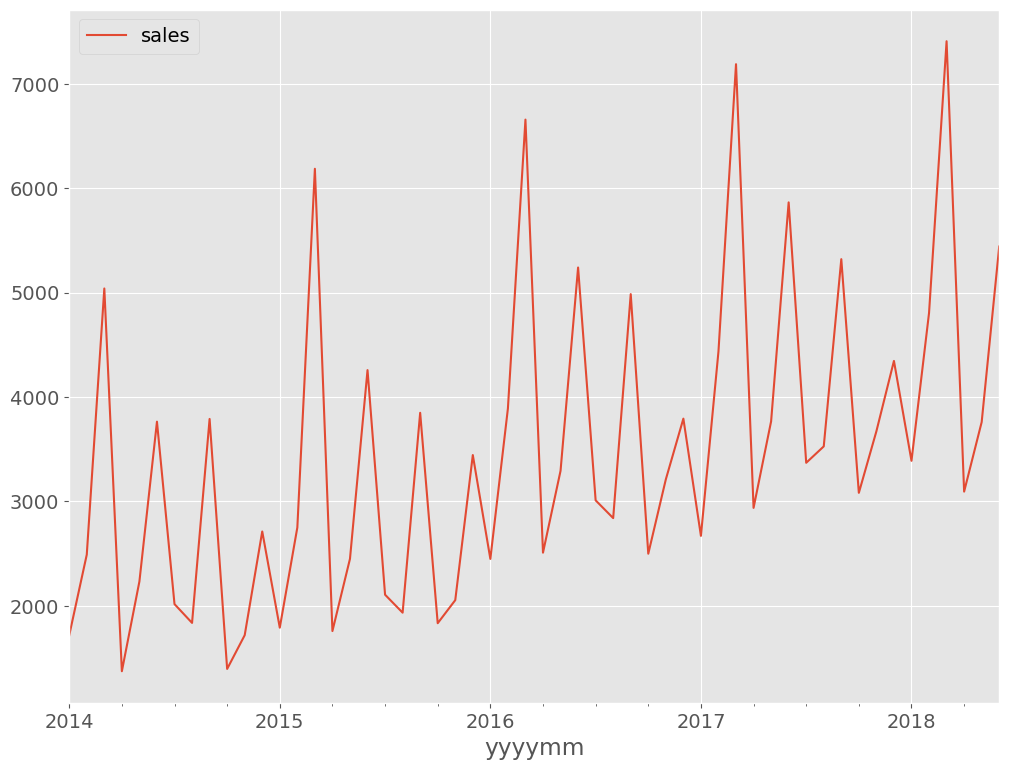

In [3]:
df.plot()
plt.show()

#### code 5-4

In [4]:
# データセットをモデル構築用データと評価対象データ（直近6ヵ月）に分割

target_length=6

df_train, df_target = train_test_split(
    df, test_size=target_length)

In [5]:
print(df_train.head())
print(df_train.tail())
print(df_target)

            sales
yyyymm           
2014-01-01   1717
2014-02-01   2490
2014-03-01   5040
2014-04-01   1373
2014-05-01   2233
            sales
yyyymm           
2017-08-01   3527
2017-09-01   5321
2017-10-01   3082
2017-11-01   3672
2017-12-01   4346
            sales
yyyymm           
2018-01-01   3389
2018-02-01   4805
2018-03-01   7409
2018-04-01   3094
2018-05-01   3760
2018-06-01   5442


#### code 5-5

In [6]:
# 予測モデルの学習（モデル構築用データ利用）

arima_model = auto_arima(
    df_train.sales,
    seasonal=True,
    m=12)
arima_model

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True)

#### code 5-6

In [7]:
# 予測の実施（モデル構築用データの期間）

train_pred = arima_model.predict_in_sample()
train_pred.head()

2014-01-01    614.235148
2014-02-01    614.235148
2014-03-01    614.235148
2014-04-01    614.235148
2014-05-01    614.235148
Freq: MS, Name: predicted_mean, dtype: float64

#### code 5-7

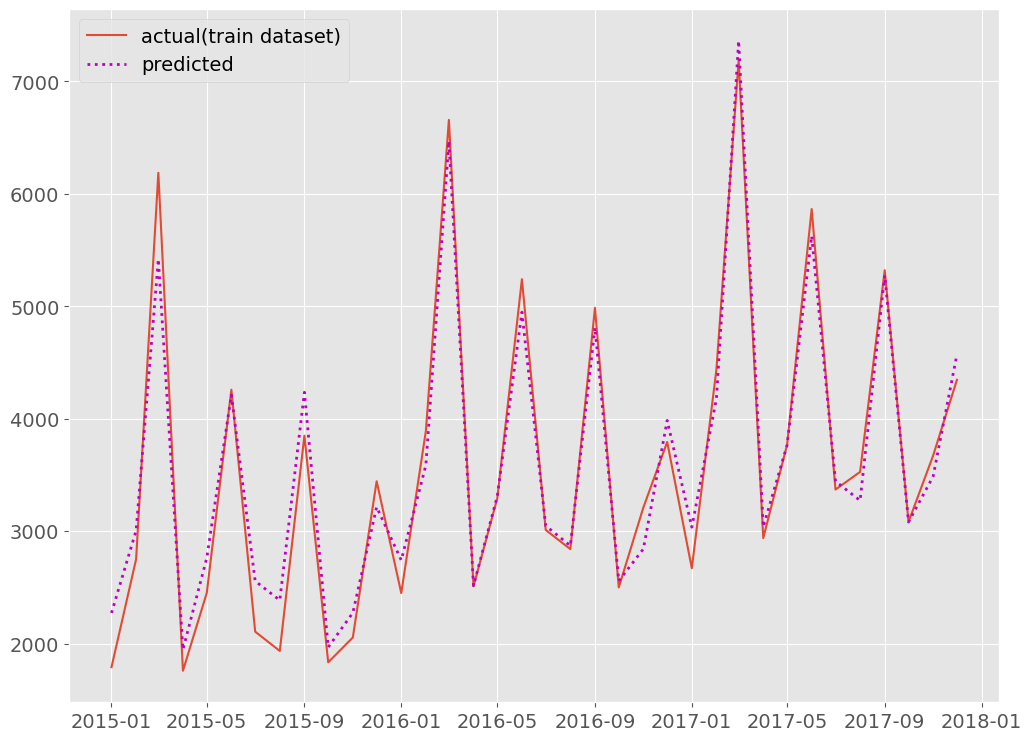

In [8]:
# グラフ（予測値と実測値）　12ヵ月周期に設定してるので最初の12ヵ月が不安定になる可能性があるのでデータをカット

fig, ax = plt.subplots()

ax.plot(
    df_train.index[12:],
    df_train.sales[12:],
    label="actual(train dataset)")
ax.plot(
    df_train.index[12:],
    train_pred[12:],
    label="predicted",
    linestyle="dotted",
    lw=2,color="m")

ax.legend()
plt.show()

In [9]:
df_train.index

DatetimeIndex(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='yyyymm', freq=None)

In [10]:
df_train.index[12:]

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='yyyymm', freq=None)

#### code 5-8

In [11]:
# 残差（実測値-予測値） 最初の12ヵ月のデータをカット

res = df_train.sales[12:]-train_pred[12:]
res

yyyymm
2015-01-01   -482.518950
2015-02-01   -254.360927
2015-03-01    768.412629
2015-04-01   -188.835069
2015-05-01   -311.044772
2015-06-01     47.472606
2015-07-01   -449.598835
2015-08-01   -451.182851
2015-09-01   -386.143036
2015-10-01   -134.663690
2015-11-01   -219.465706
2015-12-01    229.459359
2016-01-01   -292.960490
2016-02-01    304.725648
2016-03-01    189.204812
2016-04-01     -6.275598
2016-05-01    -19.105924
2016-06-01    293.739317
2016-07-01    -37.352659
2016-08-01    -30.360739
2016-09-01    176.303650
2016-10-01    -58.204125
2016-11-01    369.148891
2016-12-01   -191.751054
2017-01-01   -365.302327
2017-02-01    260.836882
2017-03-01   -172.612454
2017-04-01    -99.895243
2017-05-01      2.511840
2017-06-01    239.870446
2017-07-01    -73.424767
2017-08-01    254.823213
2017-09-01     46.964912
2017-10-01      1.065603
2017-11-01    185.444712
2017-12-01   -226.739239
dtype: float64

#### code 5-9

In [12]:
# 残差を標準化（平均0, 分散1に正規化）

res_data = res.values.reshape(-1,1)  # Numpy配列に変換
scaler = StandardScaler()                  # 標準化モデルのインスタンス
res_data_ss = scaler.fit_transform(res_data)  # 標準化モデルの学習と標準化の実施

#### code 5-10

In [13]:
# 外れ値スコアなどを計算しres_dfに結果集約

res_df = df_train[12:].copy()                   # 日付と売上だけのデータフレームを作成
res_df['pred'] = train_pred[12:]               # 予測値
res_df['residual'] = res_data                    # 残差
res_df['std_res'] = res_data_ss                # 標準化した残差
res_df['abs_std_res'] = abs(res_data_ss)  # 外れ値スコア

# 確認
print(res_df)

            sales         pred    residual   std_res  abs_std_res
yyyymm                                                           
2015-01-01   1790  2272.518950 -482.518950 -1.673380     1.673380
2015-02-01   2750  3004.360927 -254.360927 -0.829575     0.829575
2015-03-01   6187  5418.587371  768.412629  2.952983     2.952983
2015-04-01   1758  1946.835069 -188.835069 -0.587239     0.587239
2015-05-01   2450  2761.044772 -311.044772 -1.039211     1.039211
2015-06-01   4258  4210.527394   47.472606  0.286706     0.286706
2015-07-01   2106  2555.598835 -449.598835 -1.551630     1.551630
2015-08-01   1934  2385.182851 -451.182851 -1.557489     1.557489
2015-09-01   3849  4235.143036 -386.143036 -1.316950     1.316950
2015-10-01   1833  1967.663690 -134.663690 -0.386895     0.386895
2015-11-01   2054  2273.465706 -219.465706 -0.700521     0.700521
2015-12-01   3444  3214.540641  229.459359  0.959754     0.959754
2016-01-01   2449  2741.960490 -292.960490 -0.972329     0.972329
2016-02-01

#### ステップ3：異常値検知（評価対象データの期間）

#### code 5-11

In [14]:
# 予測の実施（評価対象データの期間）

target_pred = arima_model.predict(n_periods=target_length)

#### code 5-12

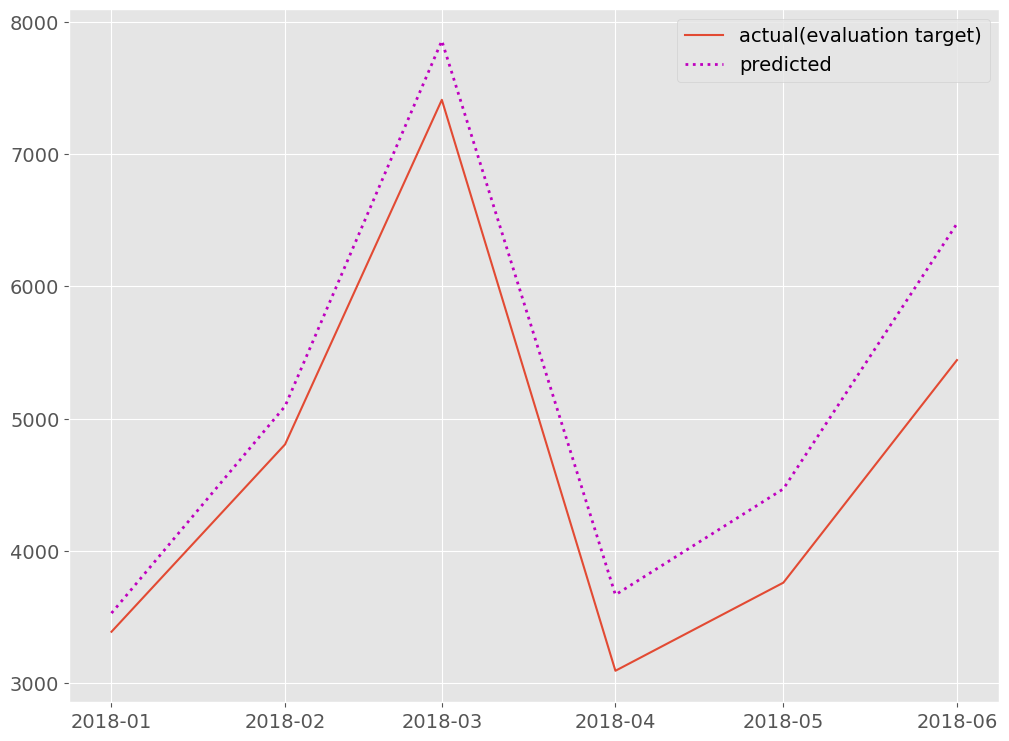

In [15]:
# グラフ化（予測値と実測値）

fig, ax = plt.subplots()

ax.plot(
    df_target.index,
    df_target.sales,
    label="actual(evaluation target)")
ax.plot(
    df_target.index,
    target_pred, label="predicted",
    linestyle="dotted",
    lw=2, color="m")

ax.legend()
plt.show()

#### code 5-13

In [16]:
# 残差（実測値ー予測値）

res = df_target.sales-target_pred
print(res)

yyyymm
2018-01-01    -140.609964
2018-02-01    -288.189211
2018-03-01    -446.173052
2018-04-01    -573.820036
2018-05-01    -708.740484
2018-06-01   -1031.141978
dtype: float64


#### code 5-14

In [17]:
#
# 標準化（平均0、分散1に正規化）
#×××　標準化しない

#res_data = res.values.reshape(-1, 1) #NumPy配列に変換
#res_data_ss = scaler.transform(res_data) #標準化
#np.mean(res_data_ss)

-1.8543276483786162

In [23]:
np.std(res_data_ss)

1.069881329779413

In [26]:
# 標準化（平均0, 分散1に正規化）
# res は pandas の DataFrame または Series と仮定されます。
# .values で NumPy 配列に変換します。
# .reshape(-1,1) で1列の2次元配列に変換（scikit-learn の scaler は2次元配列を要求するため）。

res_data = res.values.reshape(-1,1)       # Numpy配列に変換

# from sklearn.preprocessing import StandardScaler  

#scaler = StandardScaler()  # スケーラーを作成　# code 5-9で定義済み
#scaler.fit(res_data)       # データに基づいてパラメータを計算

res_data_ss = scaler.fit_transform(res_data)  # 標準化 テキストには "fit_" がもれていた
np.mean(res_data_ss)

-1.4802973661668753e-16

#### code 5-15

In [27]:
# 外れ値スコアなどを計算しtarget_res_dfに結果集約

target_res_df = df_target.copy()                         # 日付と売上だけのデータフレームを作成
target_res_df['pred'] = target_pred                     # 予測値
target_res_df['resisual'] = res_data                     # 残差
target_res_df['std_red'] = res_data_ss                # 標準化した残差
target_res_df['abs_std_res'] = abs(res_data_ss)  # 外れ値スコア

print(target_res_df)

            sales         pred     resisual   std_red  abs_std_res
yyyymm                                                            
2018-01-01   3389  3529.609964  -140.609964  1.351030     1.351030
2018-02-01   4805  5093.189211  -288.189211  0.840882     0.840882
2018-03-01   7409  7855.173052  -446.173052  0.294768     0.294768
2018-04-01   3094  3667.820036  -573.820036 -0.146478     0.146478
2018-05-01   3760  4468.740484  -708.740484 -0.612867     0.612867
2018-06-01   5442  6473.141978 -1031.141978 -1.727335     1.727335


In [31]:
np.mean(target_res_df.std_red)

-1.4802973661668753e-16

In [32]:
np.std(target_res_df.std_red)

1.0

In [33]:
print(res_data.shape)

(6, 1)


In [34]:
print(res_data[:5])

[[-140.60996385]
 [-288.18921124]
 [-446.17305186]
 [-573.8200358 ]
 [-708.74048406]]
